<a href="https://colab.research.google.com/github/vigrooo/Weapons-detection/blob/main/weapon-detection%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
#check GPU

Mon Aug 28 10:47:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
#create a dataset menu
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
#dataset from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="pLIydqQZM5KZDp543B6t")
project = rf.workspace("conner").project("weapon-set")
dataset = project.version(3).download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to weapon-set-3 in yolov8:: 100%|██████████| 7076/7076 [00:01<00:00, 3882.87it/s]


In [5]:
%cd {HOME}
#Custom Trainning (Change epochs the more the better)
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 337MB/s]
New https://pypi.org/project/ultralytics/8.0.164 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/weapon-set-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, 

In [6]:
!ls {HOME}/runs/detect/train/
#checking

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2910.jpg
confusion_matrix.png				    train_batch2911.jpg
events.out.tfevents.1693223873.887d7490ba87.1461.0  train_batch2912.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


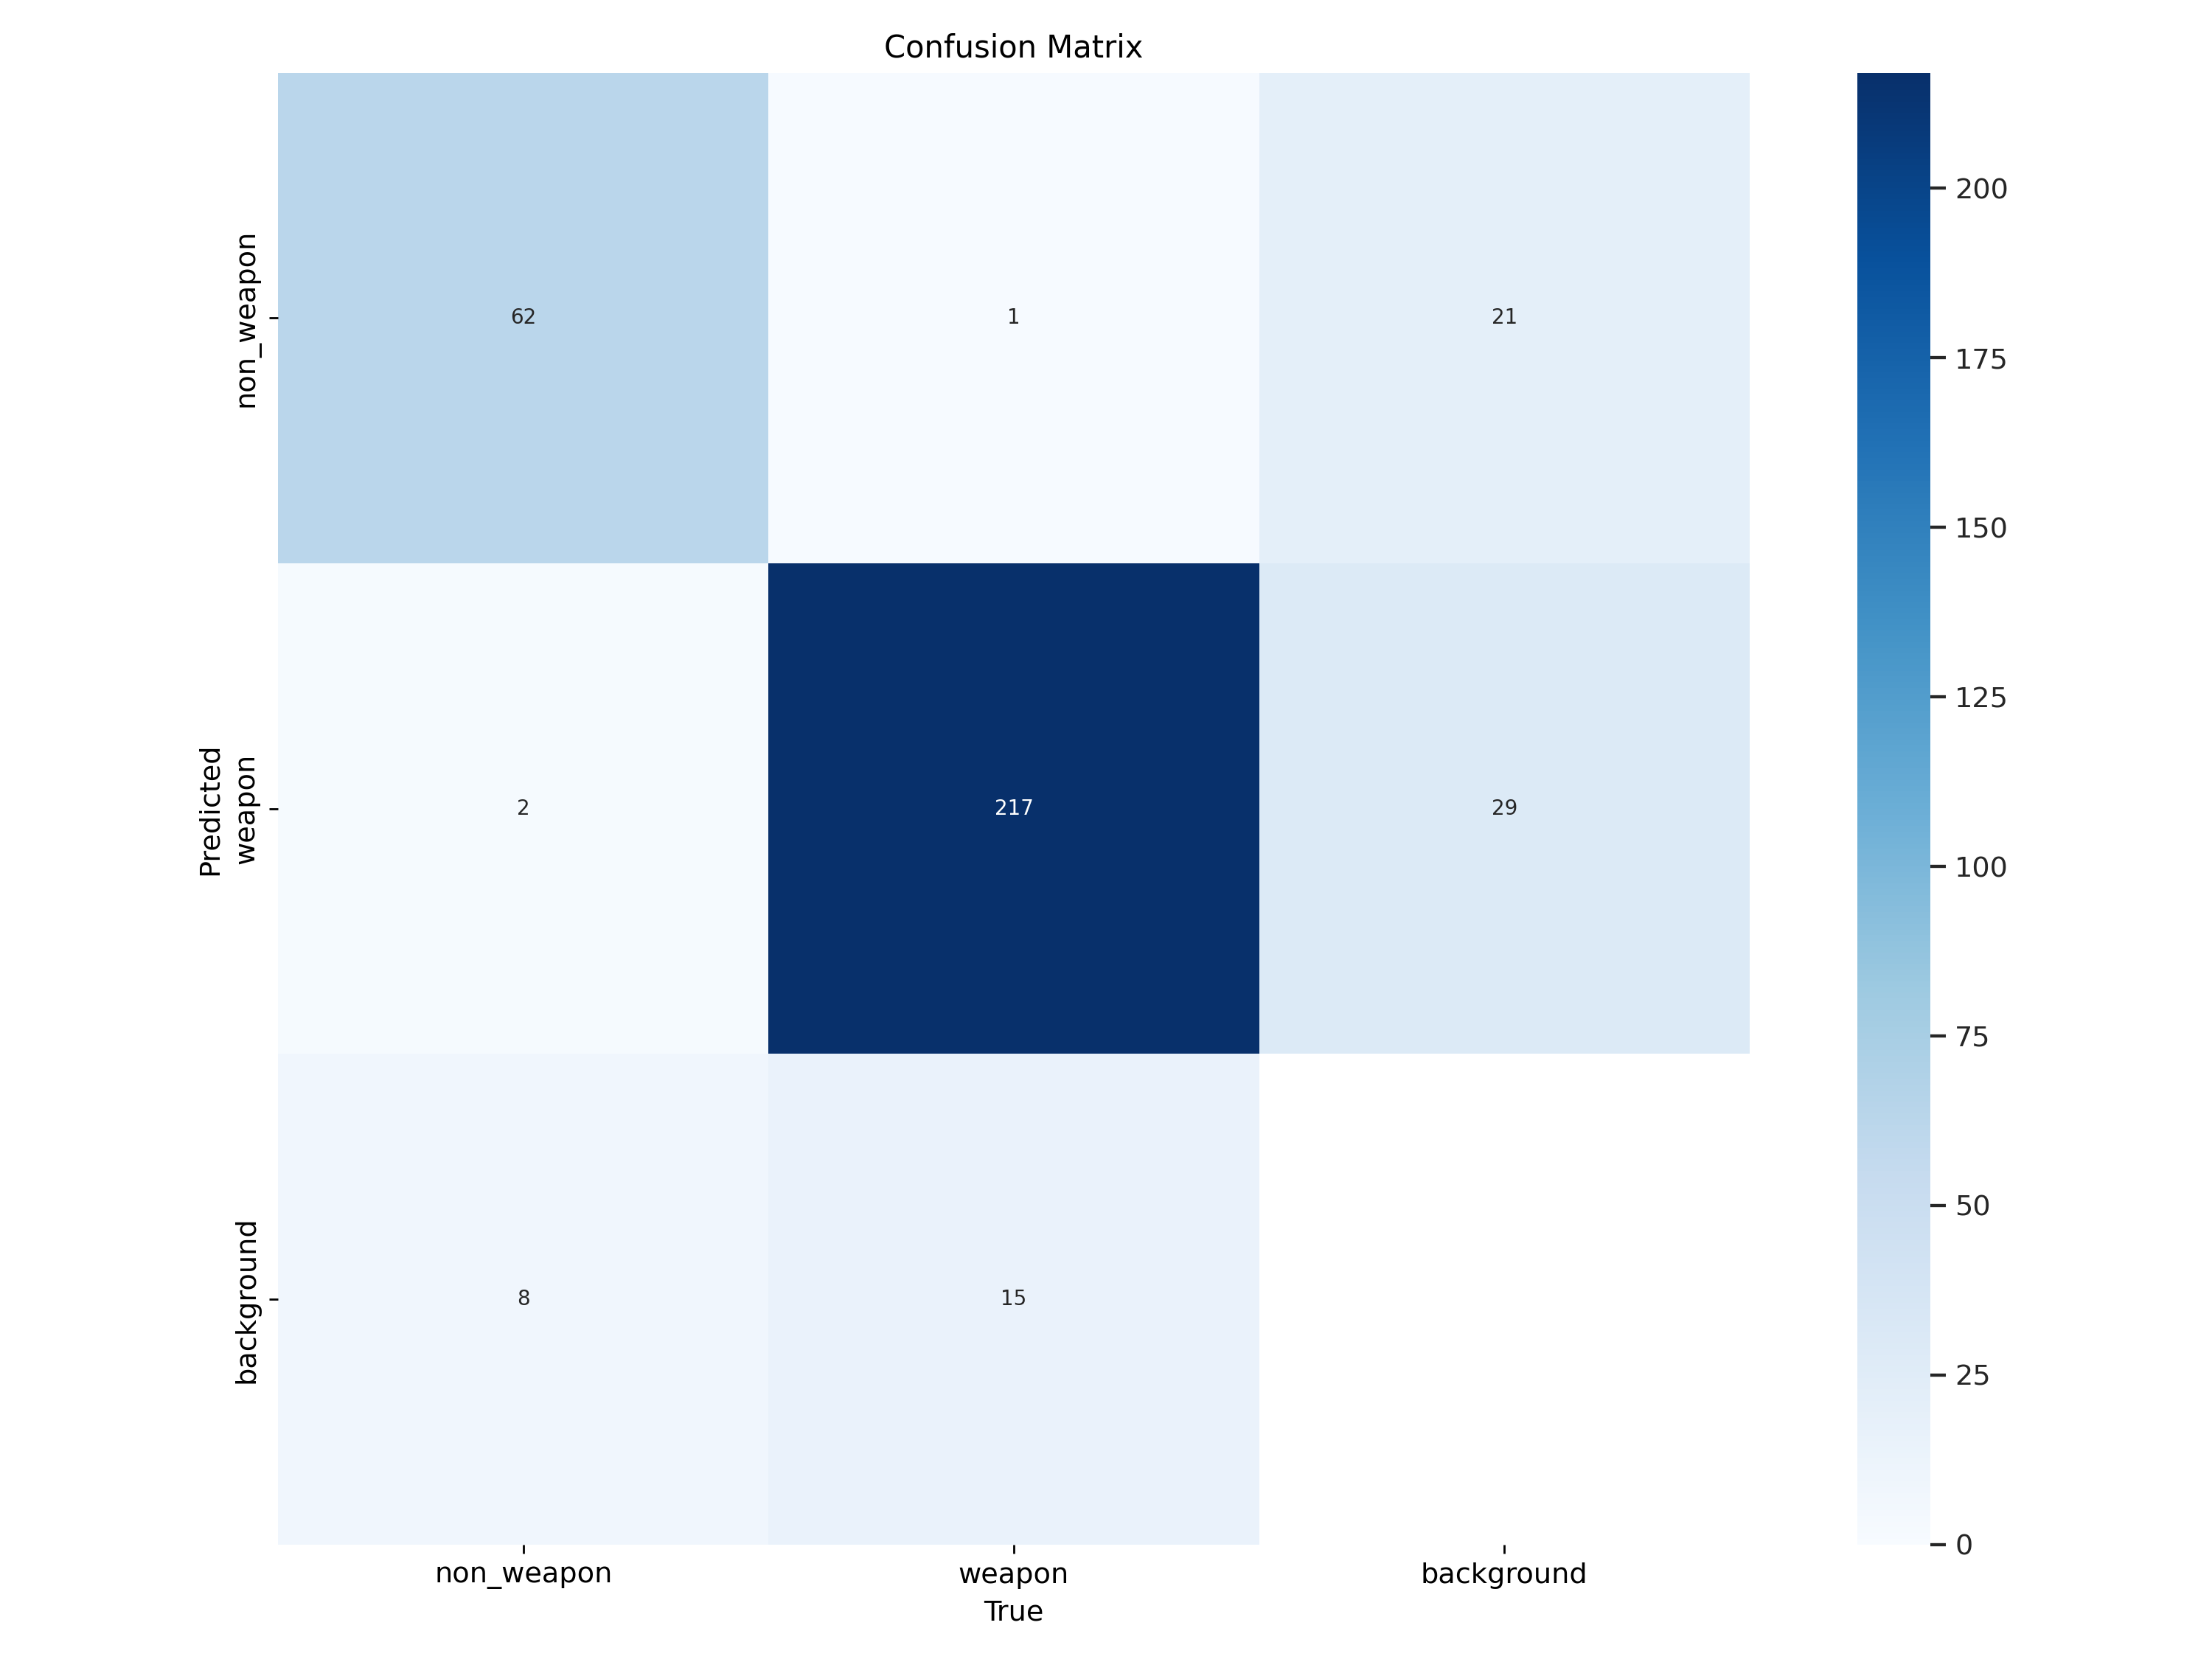

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)
#checking the confusion_matrix

/content


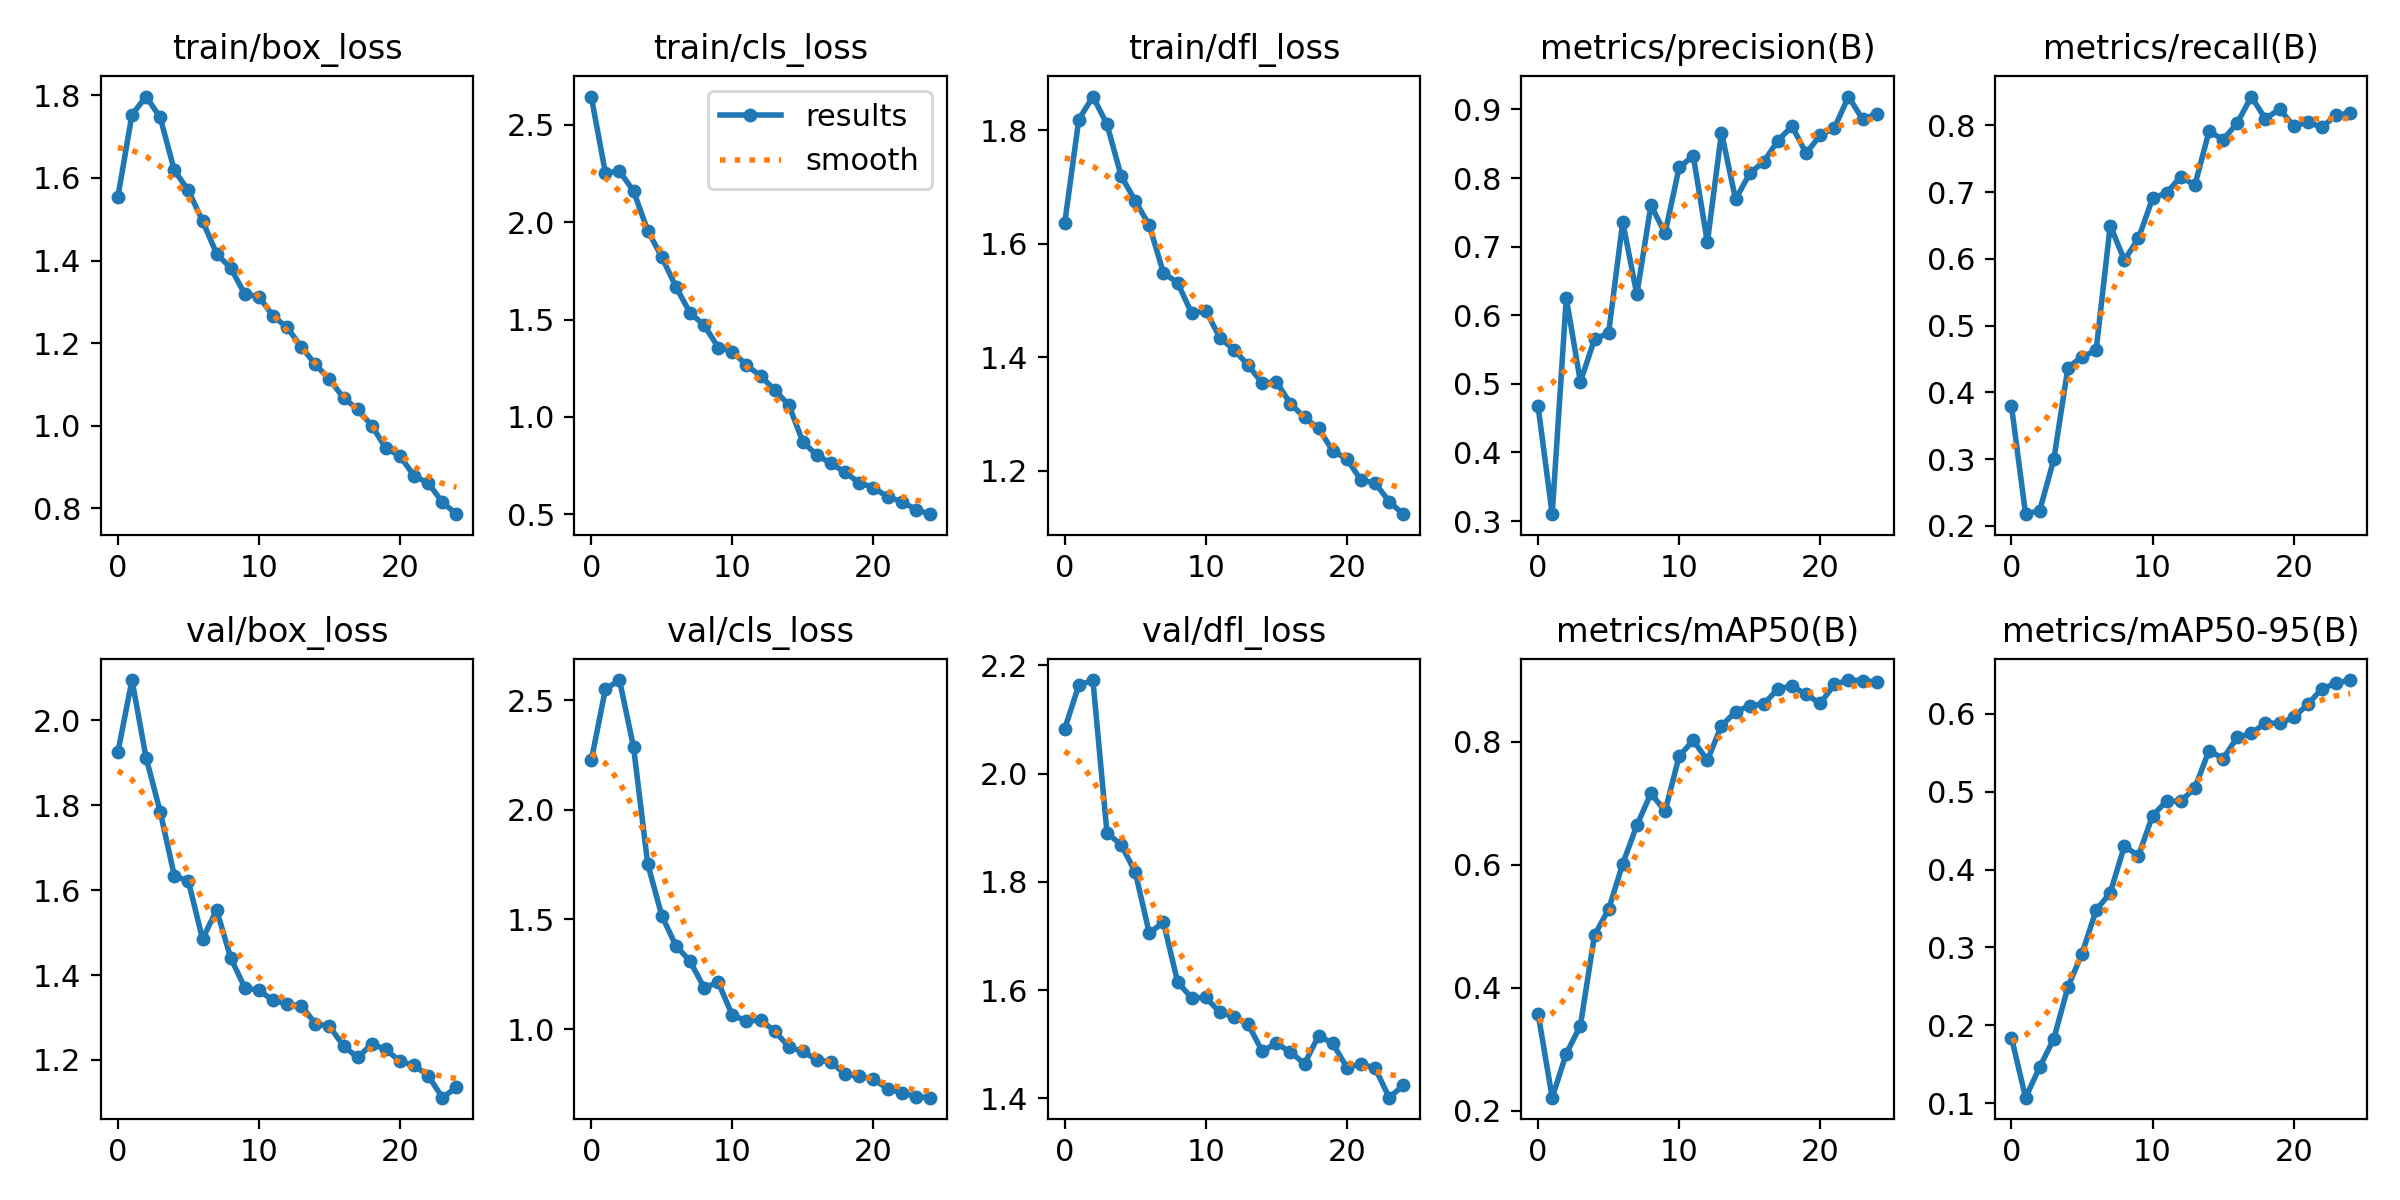

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)
#checking the result

/content


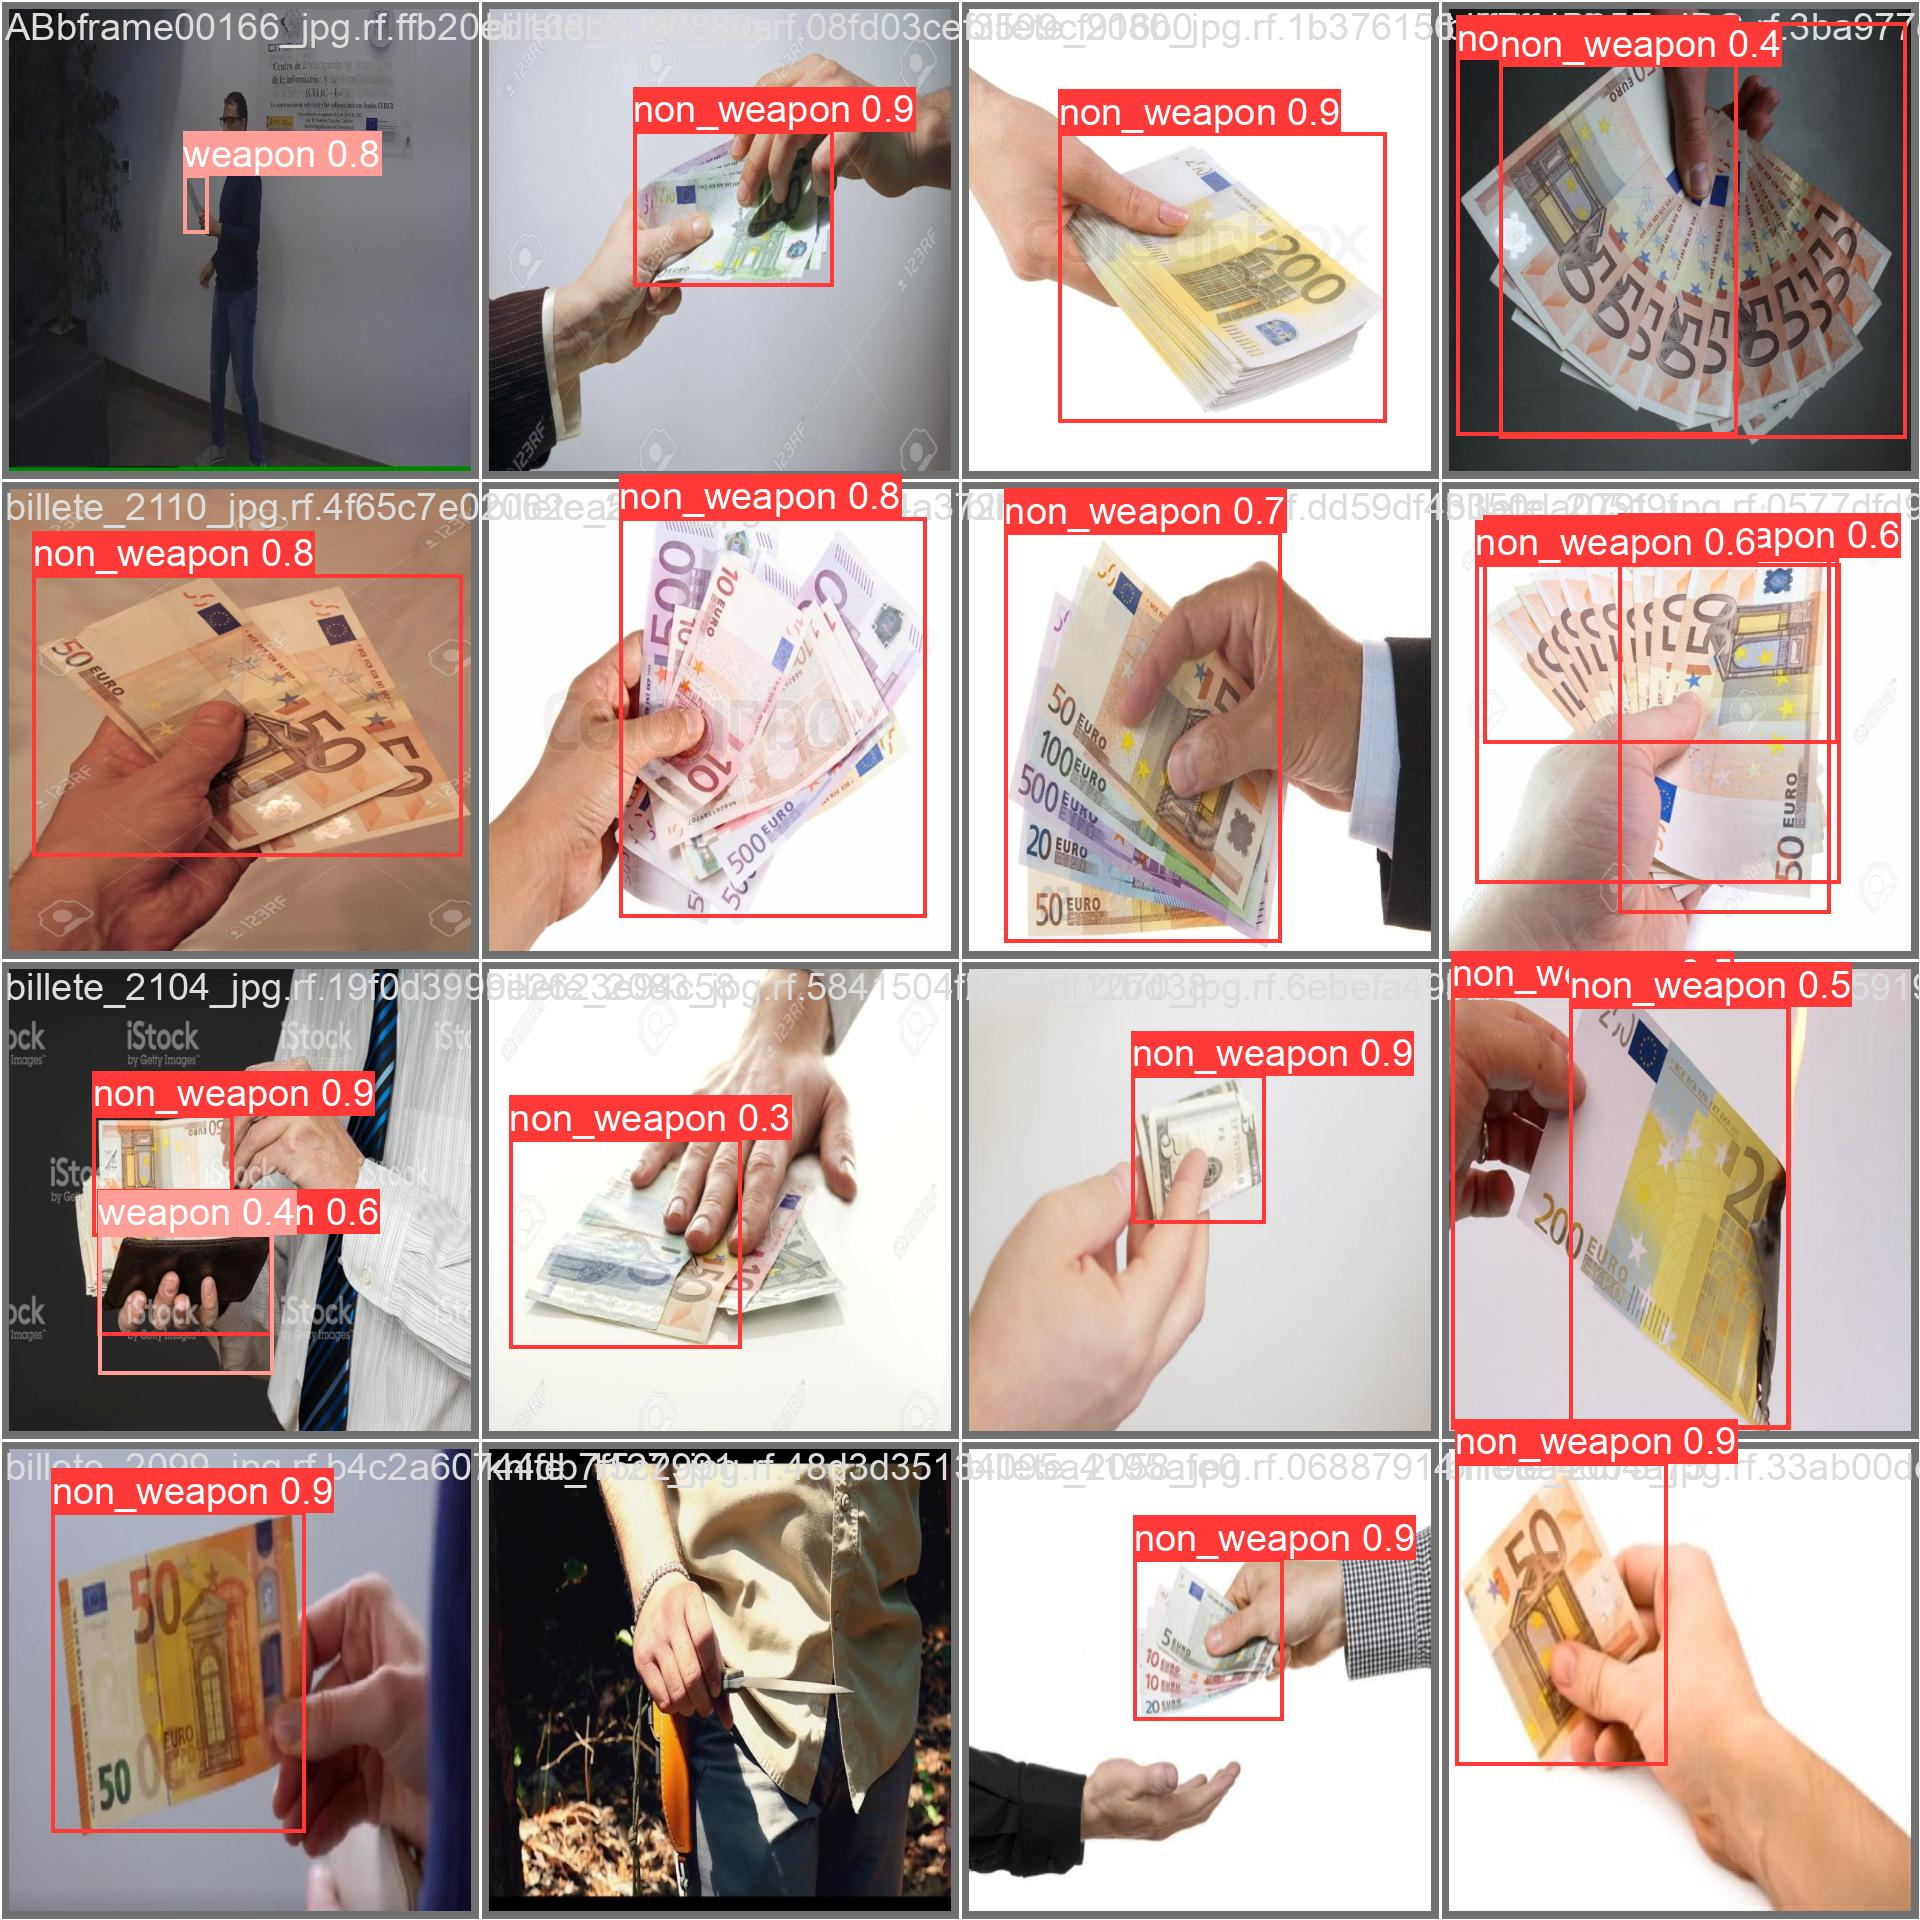

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)
#check example from val_batch0_pred.jpg

In [10]:
%cd {HOME}
#Validate custom model by using val mode
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/datasets/weapon-set-3/valid/labels.cache... 295 images, 0 backgrounds, 0 corrupt: 100% 295/295 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:07<00:00,  2.44it/s]
                   all        295        305      0.894      0.819      0.898      0.643
            non_weapon        295         72      0.848      0.775       0.88      0.651
                weapon        295        233       0.94      0.863      0.916      0.635
Speed: 1.4ms preprocess, 14.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#checking the result with tests

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/147 /content/datasets/weapon-set-3/test/images/ABbframe00271_jpg.rf.a70b9e3dedb2e93e89b1b023540ddfce.jpg: 800x800 1 weapon, 24.6ms
image 2/147 /content/datasets/weapon-set-3/test/images/ABbframe00319_jpg.rf.fdfbeaaceceee1ca700db3e6cb42dc97.jpg: 800x800 1 weapon, 24.7ms
image 3/147 /content/datasets/weapon-set-3/test/images/ABbframe00328_jpg.rf.ee92c57c24c741f9c9b8a7bb343cc6de.jpg: 800x800 1 weapon, 24.6ms
image 4/147 /content/datasets/weapon-set-3/test/images/ABmframe00157_jpg.rf.8100b4f1bd4bb9dfd4d0d1156c4f6b14.jpg: 800x800 1 weapon, 24.6ms
image 5/147 /content/datasets/weapon-set-3/test/images/ABmframe00226_jpg.rf.eaa94ca639d5ffffc477572c7c3c7e0a.jpg: 800x800 1 weapon, 24.6ms
image 6/147 /content/datasets/weapon-set-3/test/images/ABsframe00133_jpg.rf.00152f300dd9b12997563050a95f0936.jpg: 800x800 1 weapon, 24.6ms


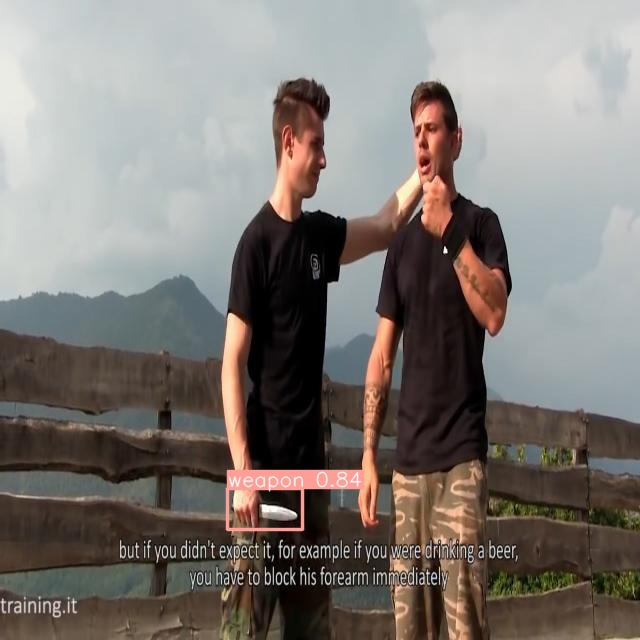

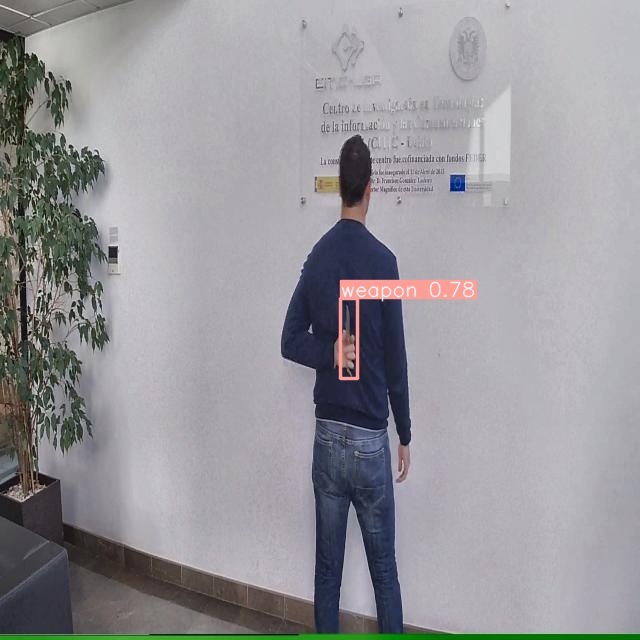

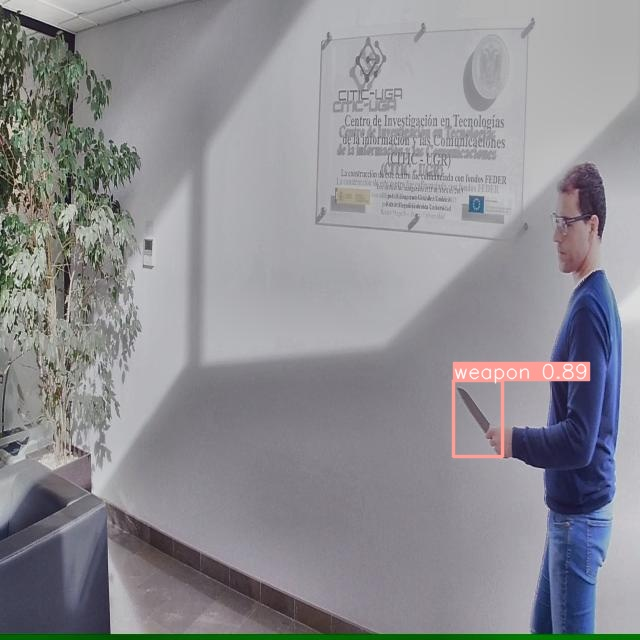

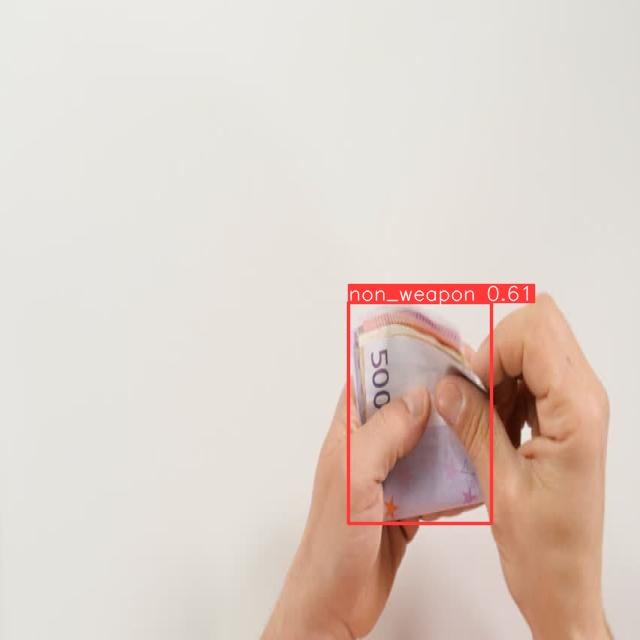

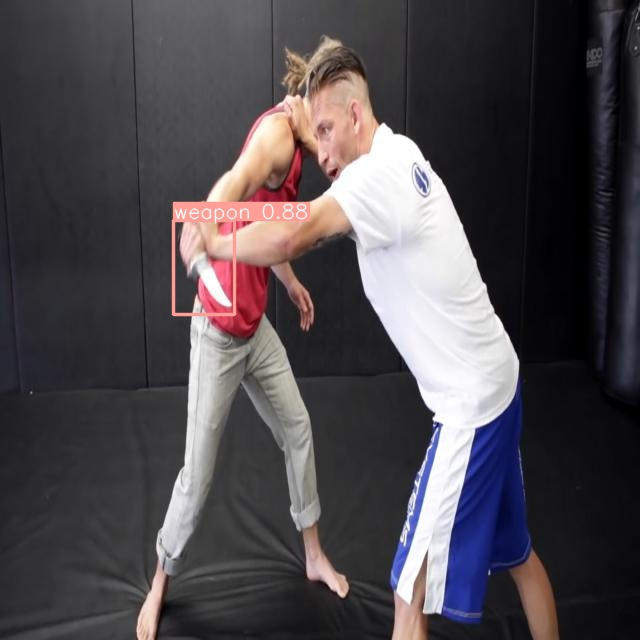

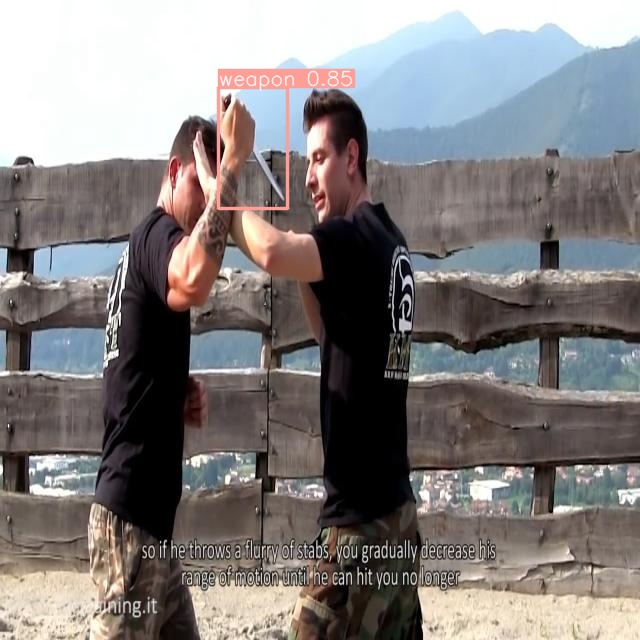

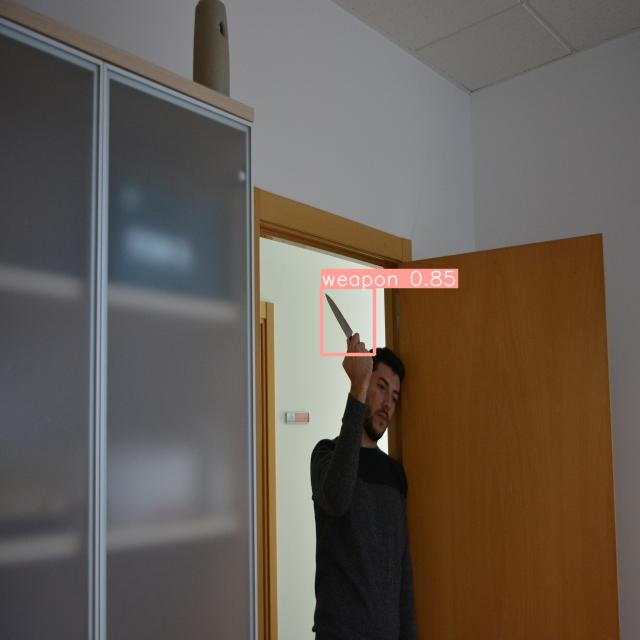

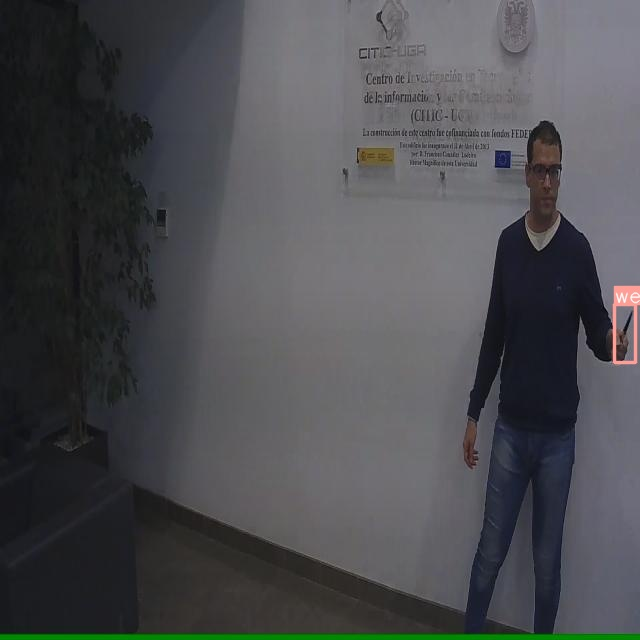

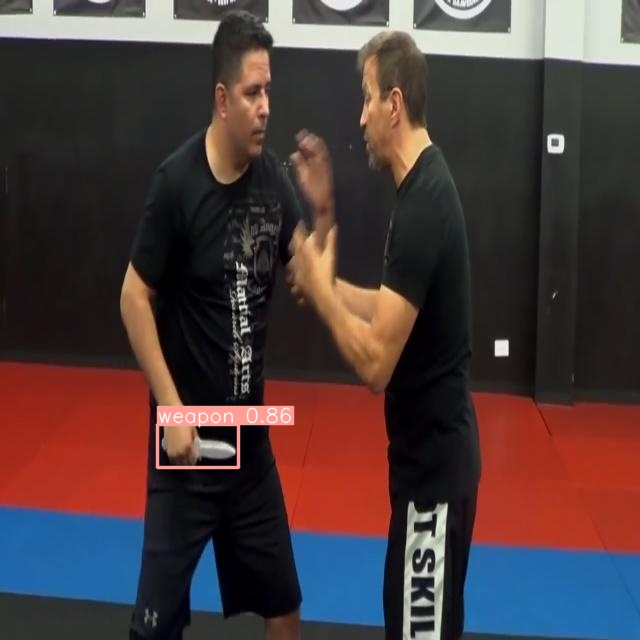

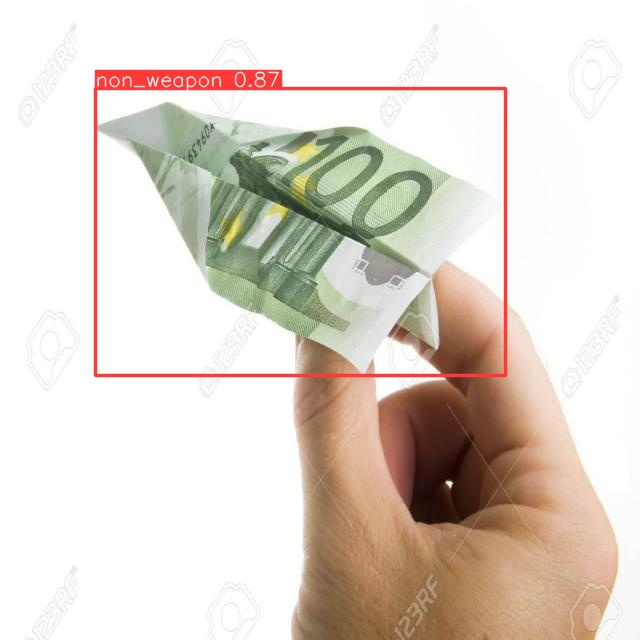

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")
#look at the result

In [13]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")
#deploying into roboflow

View the status of your deployment at: https://app.roboflow.com/conner/weapon-set/3
Share your model with the world at: https://universe.roboflow.com/conner/weapon-set/model/3
